# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

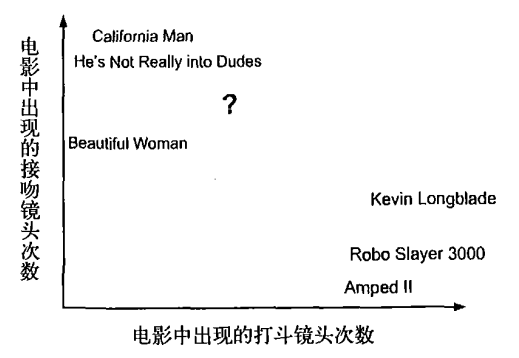

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

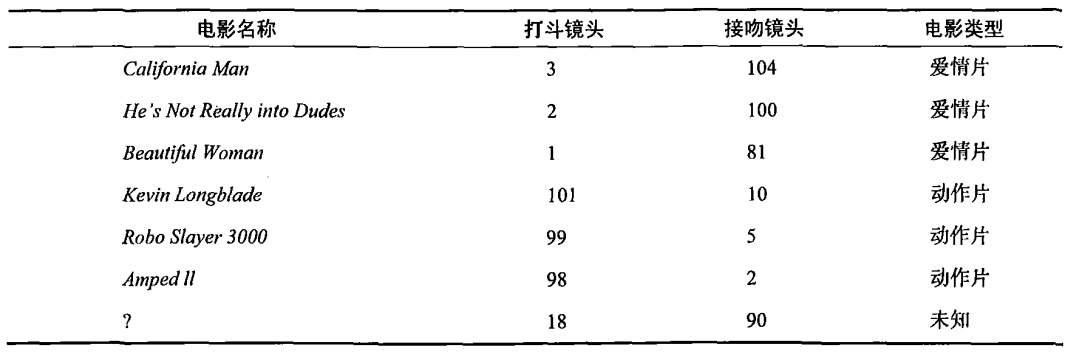

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

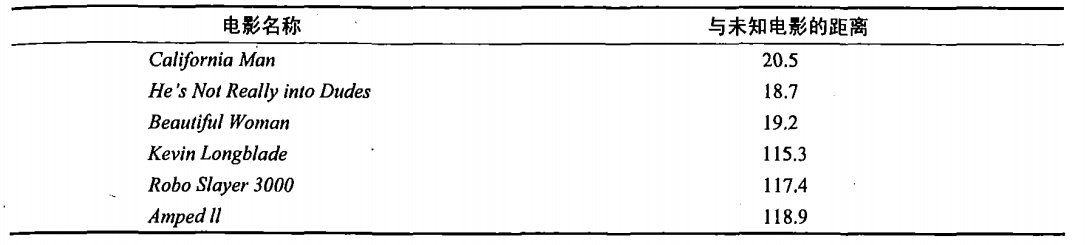

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

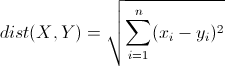

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [1]:
# 处理分类问题
from sklearn.neighbors import KNeighborsClassifier
# 处理回归问题
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# 构建KNN分类器对象
# n_neighbors应设置为一个奇数，表示距离预测样本最近的n个样本点
knnclf = KNeighborsClassifier(n_neighbors=3)

In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [6]:
# X_train必须是一个列向量（二维数组）
X_train = np.array([[19,1],[2,18],[25,1],[24,3],[3,17]])
y_train = np.array(['动作','爱情','动作','动作','爱情'])
display(X_train,y_train)

array([[19,  1],
       [ 2, 18],
       [25,  1],
       [24,  3],
       [ 3, 17]])

array(['动作', '爱情', '动作', '动作', '爱情'], dtype='<U2')

In [7]:
# 训练分类器模型
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
X_test = np.array([[13,10],[5,10]])
knnclf.predict(X_test)

array(['动作', '爱情'], dtype='<U2')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [5]:
# load_iris是机器学习库提供给我们研究算法的数据
from sklearn.datasets import load_iris
from pandas import Series,DataFrame

获取训练样本

In [6]:
iris = load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [7]:
data = iris.data
target = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [8]:
features = DataFrame(data=data,columns = feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
features.iloc[:,0].std()

0.8280661279778629

In [15]:
features.iloc[:,0].std

<bound method Series.std of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64>

In [16]:
features.iloc[:,2].std()

1.7644204199522617

In [17]:
features.iloc[:,1].std()

0.4335943113621737

In [18]:
features.iloc[:,3].std()

0.7631607417008414

In [19]:
# samples(训练集、测试集)
X_train = features.iloc[:130,2:4]
y_train = target[:130]

# 测试集(验证训练模型的准确度)
X_test = features.iloc[130:,2:4]
y_test = target[130:]

In [20]:
display(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(130, 2)

(130,)

(20, 2)

(20,)

In [21]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
# （离散性的、标称型）目标值是不参与运算的，所以不是必须要转换成数字的格式
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

绘制图形

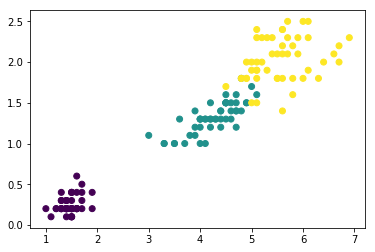

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
samples = features.iloc[:,2:4]

# 展示真实数据的分类情况
plt.scatter(samples.iloc[:,0],samples.iloc[:,1],c=target)

定义KNN分类器

In [37]:
knnclf = KNeighborsClassifier(n_neighbors=5)

第一步，训练数据

In [38]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [39]:
# 模型准确度的评估
# 1. 测试样本及应该是随机的
# 2. 测试样本集数量不能太小
y_ = knnclf.predict(X_test)

In [40]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
y_

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# 获取所有预测点（满屏幕的点）
xmin,xmax = samples.iloc[:,0].min(),samples.iloc[:,0].max()
ymin,ymax = samples.iloc[:,1].min(),samples.iloc[:,1].max()

x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)

xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

对数据进行预测

In [51]:
y_ = knnclf.predict(X_test)

显示数据

In [54]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#aa00ff','#00aaff','#ffaa00'])

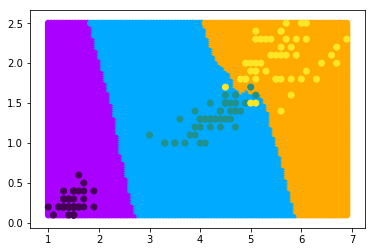

In [57]:
# 展示预测数据的分类情况
plt.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=cmap)
# 展示真实数据的分类情况
plt.scatter(samples.iloc[:,0],samples.iloc[:,1],c=target)

### 2）用于回归  
回归用于对趋势的预测

导包

In [58]:
from sklearn.neighbors import KNeighborsRegressor

生成样本数据

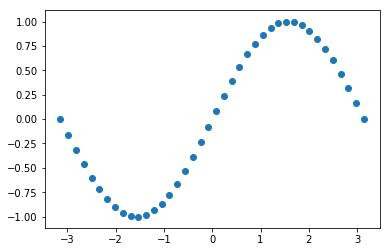

In [60]:
# 生成一组符合正弦分布的数据
x = np.linspace(-np.pi,np.pi,40)
y = np.sin(x)
# 原始数据的分布规律
plt.scatter(x,y)

In [65]:
noise = np.random.random(size=20) - 0.5
noise

array([-0.01419036, -0.05222776,  0.4114977 , -0.48535771,  0.4725629 ,
        0.49193969, -0.4352523 , -0.48704335,  0.39377464, -0.32509247,
        0.09969959, -0.10353899,  0.35402717,  0.09005099, -0.32349592,
       -0.41517568,  0.13719123,  0.40893228,  0.25830619,  0.00900481])

In [66]:
y[::2] += noise

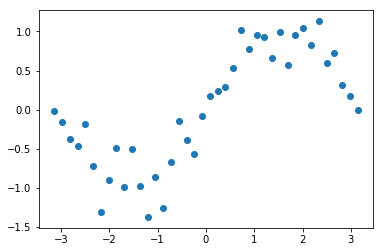

In [67]:
plt.scatter(x,y)

生成测试数据的结果

In [72]:
X_train = x.reshape(-1,1)
y_train = y

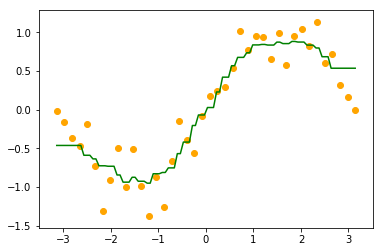

In [90]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

X_test = np.linspace(-np.pi,np.pi,100).reshape(-1,1)
y_ = knn.predict(X_test)

plt.plot(X_test,y_,color='green')
plt.scatter(X_train,y_train,color='orange')

# 过拟合
# 欠拟合
# 

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [94]:
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

display(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7352, 561)

(7352,)

(2947, 561)

(2947,)

In [96]:
DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [98]:
Series(y_train).unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [99]:
label = {1:'WALKING', 
         2:'WALKING UPSTAIRS', 
         3:'WALKING DOWNSTAIRS',
         4:'SITTING', 
         5:'STANDING', 
         6:'LAYING'}

获取数据

In [124]:
# 调整算法参数只能对算法调优，不能决定算法的高度
knnclf = KNeighborsClassifier(n_neighbors=9)

In [125]:
# KNN在训练的时候，是不进行运算的（距离）
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [126]:
# KNN在进行预测的时候，才开始计算训练集和测试集中样本点之间的距离
y_ = knnclf.predict(X_test[:1000])

# 分类算法的评分就是这么算的
(y_ == y_test[:1000]).sum()/y_.size

0.922

In [128]:
# 计算分类算法的评分
knnclf.score(X_test[:500],y_test[:500])

0.928

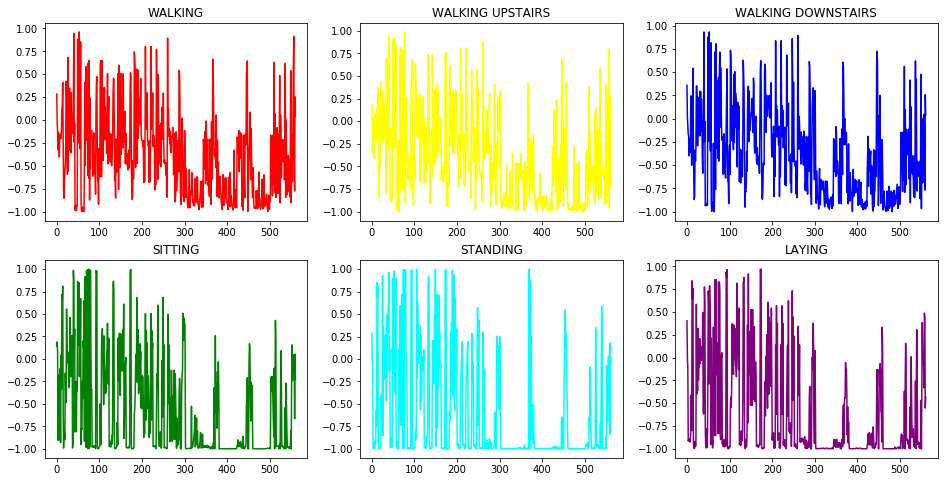

In [146]:
plt.figure(figsize=(16,8))
colors = ['red','yellow','blue','green','cyan','purple']
for i in range(1,7):
    plt.subplot(2,3,i)
    title = label[i]
    Series(X_train[y_train==i][0]).plot(color=colors[i-1],title=title)

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [147]:
pd.read_csv('../data/adults.txt')

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度